In [558]:
open('names.txt').read().split().__len__()

32033

In [559]:
words=open('names.txt','r').read().splitlines()

In [560]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [561]:
b={}
for w in words:
    chs= ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1
b

{('.', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '.'): 6640,
 ('.', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('.', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('.', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('.', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('.', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '.'): 3983,
 ('.', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('.', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '.'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '.'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a',

In [422]:
import torch 

In [423]:
N = torch.zeros((27,27), dtype=torch.int32)

In [424]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0

In [425]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [426]:
for w in words:
    chs= ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1

In [427]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [429]:
itos={i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

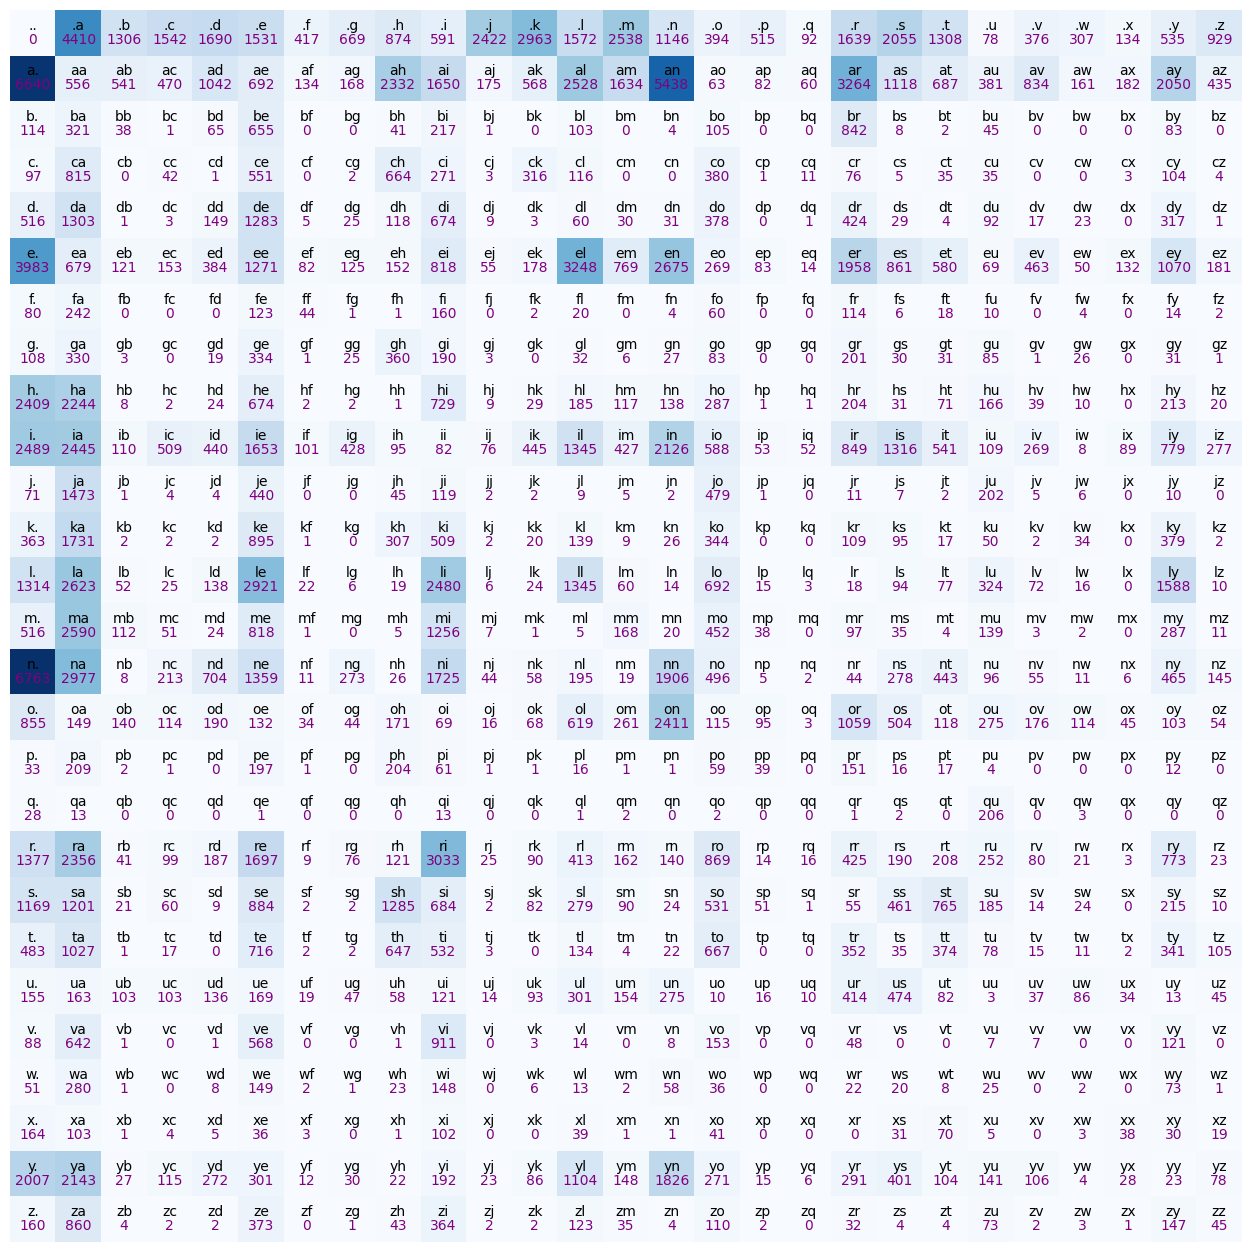

In [430]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='purple')
plt.axis('off');

In [597]:
#better way
P=(N+1).float()
P /= P.sum(1,keepdim=True)
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [598]:
#loop
g=torch.Generator().manual_seed(2147483647)

for i in range (5):
    out=[]
    ix=0
    while True:
        p=P[ix]
       
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix== 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [599]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [600]:
log_likelihood=0.0
n=0.0
for w in ['andrejqq']:
#for w in words:
    chs= ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        logprob=torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} logprob{logprob : .4f} ')

print(f'{log_likelihood=}')
nll=-log_likelihood
print(f'{nll=}')
print(f'{nll/n}')


.a: 0.1376 logprob-1.9835 
an: 0.1604 logprob-1.8302 
nd: 0.0384 logprob-3.2594 
dr: 0.0770 logprob-2.5646 
re: 0.1334 logprob-2.0143 
ej: 0.0027 logprob-5.9004 
jq: 0.0003 logprob-7.9817 
qq: 0.0033 logprob-5.7004 
q.: 0.0970 logprob-2.3331 
log_likelihood=tensor(-33.5677)
nll=tensor(33.5677)
3.7297401428222656


In [632]:
#Create the training set of bigrams(x,y)
xs,ys=[],[]
for w in words[:1]:
    chs= ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [633]:
ys.shape,xs.shape

(torch.Size([5]), torch.Size([5]))

'.'

In [635]:
words[:1]

['emma']

In [664]:
import torch.nn.functional as F 
F.one_hot(xs)
xenc=F.one_hot(xs,num_classes=27).float()
yenc=F.one_hot(xs,num_classes=27).float()

In [680]:
xs

tensor([ 0,  5, 13, 13,  1])

In [665]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

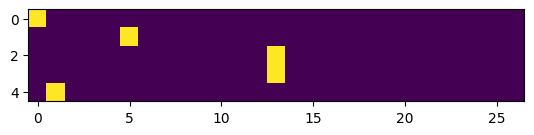

In [666]:
plt.imshow(xenc)

In [667]:
xenc.shape

torch.Size([5, 27])

In [668]:
xenc.dtype

torch.float32

In [749]:
W=torch.randn(27,27)
W

tensor([[-0.4347,  0.2482,  0.2324,  0.0414, -0.5178, -0.8348,  0.6489,  0.3675,
          1.5052,  0.5358,  0.3403,  0.4230,  0.6494,  2.0307, -0.6812, -1.6832,
          0.6249,  0.3455,  1.0491, -1.0708,  0.2833,  0.6255, -0.1076, -0.5537,
          1.1535, -0.9630,  0.0857],
        [-0.1157, -0.1796,  0.1715,  0.1316,  1.2950,  0.5183,  0.6383, -0.2912,
         -0.1931,  0.2774,  1.0135, -0.1763,  0.4504,  0.3711, -0.6402,  1.3871,
          0.6504,  0.2767, -0.1849, -1.9745, -0.4854,  0.2090,  1.3401, -0.0759,
          0.1980, -0.6696, -0.0528],
        [ 0.9041,  1.0026,  0.7236,  0.9876, -1.0530, -0.6547, -1.3922, -1.0753,
          1.1385, -0.1551, -0.5279, -0.5579,  1.0700,  0.4388, -0.9885,  0.1945,
         -0.5001,  1.2096,  1.0449, -1.3114,  1.5205,  0.4083, -0.5779,  0.2847,
          0.7108, -1.0966, -0.0386],
        [ 1.2859, -0.6028,  0.1546,  1.0906,  0.8704,  1.0207, -0.8258,  0.1768,
         -1.0025,  1.1412,  0.7076, -1.0205, -0.0382, -1.3208, -1.1731,  0.5105

In [753]:
W[0,:]

tensor([-0.4347,  0.2482,  0.2324,  0.0414, -0.5178, -0.8348,  0.6489,  0.3675,
         1.5052,  0.5358,  0.3403,  0.4230,  0.6494,  2.0307, -0.6812, -1.6832,
         0.6249,  0.3455,  1.0491, -1.0708,  0.2833,  0.6255, -0.1076, -0.5537,
         1.1535, -0.9630,  0.0857])

In [725]:
yenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [717]:
# Printing each row on a new line
for row in xenc:
    print(row.numpy())

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [715]:
xenc.shape

torch.Size([5, 27])

In [778]:
# 5x27  @  27x27 == 5x27
logits=xenc @ W
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)

In [779]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [774]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [775]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'


In [776]:
probs.shape
torch.Size([5, 27])
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

### --------------- !! OPTIMIZATION !! --------------

In [783]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g,requires_grad=True)

In [793]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss=-probs[torch.arange(5),ys].log().mean()

In [794]:
print(loss.item())

3.7291626930236816


In [791]:
#backward pass 
W.grad= None #set to zero the gradient 
loss.backward()

In [792]:
W.data += -0.1 * W.grad

In [803]:
xs,ys= [],[]
for w in words:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)
num=xs.nelement()
print('number of examples:',num)

#initialize the network
g=torch.Generator().manual_seed(2147483647)
W=torch.randn((27,27),requires_grad=True,generator=g)

number of examples: 228146


In [812]:
#gradient descent
for k in range(1000):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)#probs for the next char
    loss=-probs[torch.arange(num),ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    #backward pass 
    W.grad=None #set to zero the grad
    loss.backward()

    #update
    W.data += -50*W.grad

2.495973587036133
2.4958646297454834
2.495758533477783
2.495654821395874
2.4955523014068604
2.495452404022217
2.4953534603118896
2.4952564239501953
2.495159864425659
2.495065212249756
2.4949707984924316
2.494877815246582
2.494786024093628
2.4946951866149902
2.49460506439209
2.494515895843506
2.4944276809692383
2.494340419769287
2.4942538738250732
2.4941675662994385
2.49408221244812
2.493997812271118
2.4939143657684326
2.493831157684326
2.493748903274536
2.493666887283325
2.4935858249664307
2.4935057163238525
2.4934258460998535
2.493346691131592
2.493267774581909
2.493189573287964
2.493112564086914
2.4930357933044434
2.492959499359131
2.4928836822509766
2.4928083419799805
2.492733955383301
2.492659568786621
2.492586135864258
2.4925127029418945
2.4924402236938477
2.49236798286438
2.4922964572906494
2.492225408554077
2.492154359817505
2.492084264755249
2.4920144081115723
2.4919450283050537
2.4918763637542725
2.491807699203491
2.4917402267456055
2.4916725158691406
2.491605758666992
2.49153

In [814]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    p = P[ix]
    # ----------
    # NOW:
    # xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    # logits = xenc @ W # predict log-counts
    # counts = logits.exp() # counts, equivalent to N
    # p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [815]:
xenc

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [842]:
    
for i in range (5):
    out=[]
    ix=0

    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        p=logits.exp()/logits.exp().sum(1,keepdims=True)
        ix= torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])

        if ix==0:
            break
        
    print(''.join(out))

ve.
h.
moge.
jaresynivien.
usien.


In [813]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.
